# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. A variável target é o valor mediano de uma casa em um distrito da California (expresso em cem mil dolares)

O dataset é derivada do censo americano de 1990. Cada linha representa a menor unidade geográfica em que o censo pública informações (geralmente essas unidades geográficas tem uma população entre 600 e 3000 moradores).

Como as informações de número de quartos e banheiros são fornecidas pelos moradores, em regiões onde há muitas casa vazias ou casas de temporada, essas variáveis podem apresentar uma média surpreendentemente altas

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|MedInc| Renda Média na região | 
|HouseAge| Idade média das casas na região |
|AveRooms| Número médio de quartos por domicílio |
|AveBedrms| Número médio de banheiros por domicílio|
|Population| População na região|
|AveOccup| Número médio de residentes por domicílio|
|Latitude| Latitude da região|
|Longitude| Longitude da região|

In [40]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['MedHouseVal'])
df = pd.concat([X,y], axis=1)

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

<AxesSubplot: >

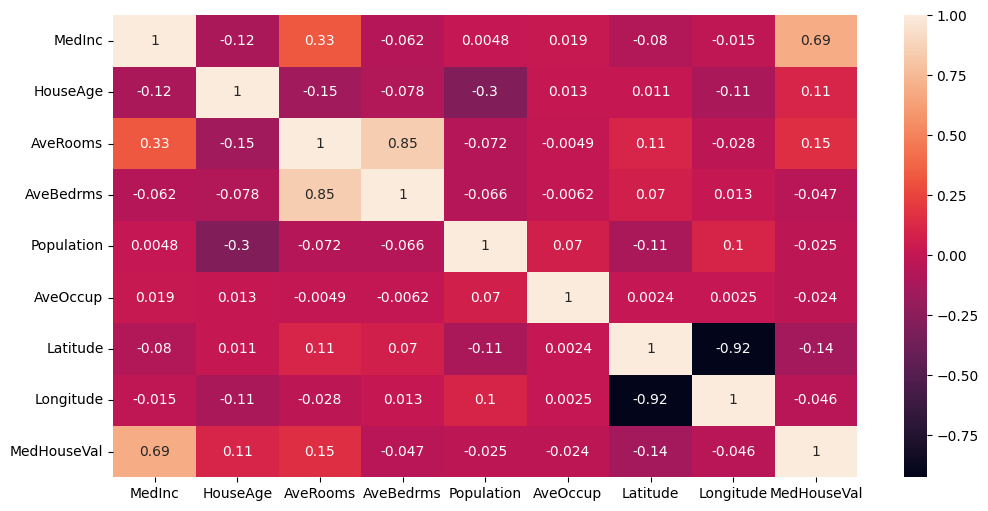

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

### 3. Separe os dados em validação e teste

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [31]:
#Criando as árvores
tree_md2 = DecisionTreeRegressor(max_depth=2)
tree_md8 = DecisionTreeRegressor(max_depth=8)

In [32]:
#treinando as árvores
tree_md2.fit(X_train, y_train)
tree_md8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [33]:
#Calculando R2 da árvore de profundidade 2 para Treino e Teste
r2_train = tree_md2.score(X_train, y_train)
r2_test = tree_md2.score(X_test, y_test)

print(f"R2 - Tree Max Depth 2: Treino ({r2_train}) Teste ({r2_test})")

R2 - Tree Max Depth 2: Treino (0.4520447281677594) Teste (0.4244060273337801)


In [34]:
#Calculando R2 da árvore de profundidade 2 para Treino e Teste
r2_train = tree_md8.score(X_train, y_train)
r2_test = tree_md8.score(X_test, y_test)

print(f"R2 - Tree Max Depth 8: Treino ({r2_train}) Teste ({r2_test})")

R2 - Tree Max Depth 8: Treino (0.7601733883178261) Teste (0.6779284983766045)


In [38]:
#Calculando MSE da árvore de profundidade 2 para Treino e Teste
mse_train = mse(y_train, tree_md2.predict(X_train))
mse_test = mse(y_test, tree_md2.predict(X_test))

print(f"MSE - Tree Max Depth 2: Treino ({mse_train}) Teste ({mse_test})")

MSE - Tree Max Depth 2: Treino (0.7324946684204919) Teste (0.7542635096031616)


In [39]:
#Calculando MSE da árvore de profundidade 2 para Treino e Teste
mse_train = mse(y_train, tree_md8.predict(X_train))
mse_test = mse(y_test, tree_md8.predict(X_test))

print(f"MSE - Tree Max Depth 8: Treino ({mse_train}) Teste ({mse_test})")

MSE - Tree Max Depth 8: Treino (0.32059498910401363) Teste (0.4220453873628258)


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>Olhando para as métricas a árvore com profundidade 8 tem um valor R2 maior e um valor MSE menor, logo apresentou melhores resultados</p>
</div>

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

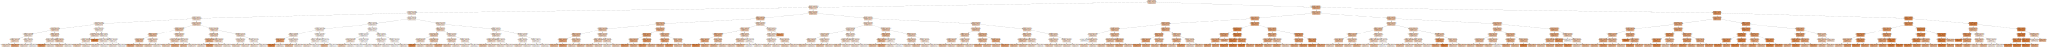

In [41]:
dot_data = tree.export_graphviz(tree_md8, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>A variável MedInc parece ser uma boa preditora</p>
</div>